In [1]:
# Import necessary libraries
import pandas as pd
import re
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, log_loss
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
import nltk
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from sklearn.svm import SVC

# Download NLTK stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\65876\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# Define stop words for English
stop_words = set(stopwords.words('english'))

In [214]:
# Function to clean and tokenize the text
stop_words = set(stopwords.words('english'))
def clean_text(text):
    # Remove non-alphabetic characters
    text = re.sub(r'\W', ' ', text)
    # Lowercase the text
    text = text.lower()
    # Tokenize and remove stopwords
    tokens = [word for word in text.split() if word not in stop_words]
    return ' '.join(tokens)


In [4]:
# Load the dataset (replace with your own file path if needed)
df = pd.read_csv('articles_data.csv')
df.tail()

,Unnamed: 0,search_query,title,link,content
615,615,maritime,San Francisco Gets $11 Million Grant for High-...,https://maritime-executive.com/article/san-fra...,\n Published\n\t\t\t\tby\n \n\n...
616,616,maritime,U.S. Navy Underwrites Renewed Expansion at Sub...,https://maritime-executive.com/article/u-s-nav...,\n Published\n\t\t\t\tby\n \n\n...
617,617,maritime,First Ammonia STS Demonstrates Protocols for A...,https://maritime-executive.com/article/first-a...,\n Published\n\t\t\t\tby\n \n\n...
618,618,maritime,Lost Submersible Had a Long List of Failures B...,https://maritime-executive.com/article/lost-su...,\n Published\n\t\t\t\tby\n \n\n...
619,619,maritime,U.S. Moves Forward with Sweeping Tariffs on Ch...,https://maritime-executive.com/article/u-s-mov...,\n Published\n\t\t\t\tby\n \n\n...


In [5]:
df['content'].iloc[4]

' SINGAPORE : The world’s second busiest container port at Singapore has seen a major spike in congestion, forcing carriers to stretch charter agreements and to build container fleets in preparation for an elongated peak season. According to Hong Kong analyst Linerlytica significant new port congestion has added to the already over-stretched container market that is struggling to cope with shortages of container equipment and vessel space, mainly as a consequence of the Red Sea diversions. “The global port congestion indicator hit the 2m TEUs mark, accounting for 6.8% of the global fleet with Singapore becoming the new congestion hotspot. The SCFI [Shanghai Containerized Freight Index] has jumped by 42% in the past month, with further gains to follow in June as carriers are adding new surcharges and rate hikes,” commented Linerlytica in its latest weekly report. Carriers have been forced to secure new equipment and extend vessel charters beyond September “after their initial hesitation

In [6]:
# Clean the 'content' column (assuming 'content' contains the article text and 'search_query' is the category)
df['cleaned_content'] = df['content'].fillna("").apply(clean_text)


In [7]:

# Split the data into features (content) and labels (categories)
X = df['cleaned_content']
y = df['search_query']


In [8]:
y.value_counts()

search_query
vessel delay                                             60
vessel accidents                                         60
port congestion                                          60
cargo damage and loss                                    60
inland transportation risks                              60
maritime environmental impacts and pollution             60
maritime                                                 60
martime piracy or terrorism risk                         40
port criminal activites                                  40
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
maritime unstable regulatory and politcal environment    40
Name: count, dtype: int64

In [9]:
X.iloc[4]

'singapore world second busiest container port singapore seen major spike congestion forcing carriers stretch charter agreements build container fleets preparation elongated peak season according hong kong analyst linerlytica significant new port congestion added already stretched container market struggling cope shortages container equipment vessel space mainly consequence red sea diversions global port congestion indicator hit 2m teus mark accounting 6 8 global fleet singapore becoming new congestion hotspot scfi shanghai containerized freight index jumped 42 past month gains follow june carriers adding new surcharges rate hikes commented linerlytica latest weekly report carriers forced secure new equipment extend vessel charters beyond september initial hesitation commit far ahead event demand would falter summer peak season claimed linerlytica berthing delays continue lengthen industry sources say delays singapore hit week cases container lines increasingly bypassing port keep vess

In [10]:
X.head()

0    dsv sudden dropdsv schenker boost day fivezim ...
1    singapore singapore port operator psa singapor...
2    published maritime executive published maritim...
3    almost 90 container ships arrive singapore sch...
4    singapore world second busiest container port ...
Name: cleaned_content, dtype: object

In [11]:
y.head()

0    vessel delay
1    vessel delay
2    vessel delay
3    vessel delay
4    vessel delay
Name: search_query, dtype: object

In [12]:
# Split into training and test data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h1>Multinomial Naïve Bayes Model, Vectorizer: CountVectorizer</h1>

In [13]:
# Use CountVectorizer to convert the text into numerical data (word counts)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [14]:
# Create and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [15]:
# Predict on the test set
y_pred = nb_model.predict(X_test_vec)

In [16]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification or 'macro'/'micro' for multiclass

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Same here, use 'binary' or 'macro'/'micro' for multiclass


# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.73
Precision: 0.78
Recall: 0.73
F1 Score: 0.74


In [17]:
# Function to classify new articles
def classify_new_article(article_text):
    cleaned_text = clean_text(article_text)
    vectorized_text = vectorizer.transform([cleaned_text])
    predicted_category = nb_model.predict(vectorized_text)[0]
    return predicted_category

In [18]:
# Example usage: Classify a new article
new_article = "crash"
predicted_category = classify_new_article(new_article)
print(f"Predicted Category: {predicted_category}")

Predicted Category: vessel accidents


<h1>Multinomial Naïve Bayes Model, Vectorizer: TfidfVectorizer</h1>

In [19]:
# Use TfidfVectorizer to convert the text into numerical data (word counts)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [20]:
# Create and train the Naive Bayes model
# we use multinomial NB because its categorical data
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

In [21]:
# Predict on the test set
y_pred = nb_model.predict(X_test_vec)

In [22]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification or 'macro'/'micro' for multiclass

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Same here, use 'binary' or 'macro'/'micro' for multiclass


# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.66
Precision: 0.80
Recall: 0.66
F1 Score: 0.66


In [23]:
# Function to classify new articles
def classify_new_article(article_text):
    cleaned_text = clean_text(article_text)
    vectorized_text = vectorizer.transform([cleaned_text])
    predicted_category = nb_model.predict(vectorized_text)[0]
    return predicted_category

# Example usage: Classify a new article
new_article = "crash"
predicted_category = classify_new_article(new_article)
print(f"Predicted Category: {predicted_category}")

Predicted Category: vessel accidents


<h1>SVM Model, Tokenizer: Word2Vec</h1>

In [24]:
# Use CountVectorizer to convert the text into numerical data (word counts)
X_train_tokenized = [sentence.split() for sentence in X_train]
X_test_tokenized = [sentence.split() for sentence in X_test]
word2vec_model = Word2Vec(sentences=X_train_tokenized, vector_size=100, window=1, min_count=1, workers=5)

In [25]:
def get_avg_word2vec_vector(words, model, vector_size):
    vector = np.zeros(vector_size)
    count = 0
    
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    
    if count > 0:
        vector /= count
    
    return vector

# Vector size is the same as what you set in the Word2Vec model
vector_size = word2vec_model.vector_size

# Convert training and test data
X_train_vec = np.array([get_avg_word2vec_vector(sentence, word2vec_model, vector_size) for sentence in X_train_tokenized])
X_test_vec = np.array([get_avg_word2vec_vector(sentence, word2vec_model, vector_size) for sentence in X_test_tokenized])

In [26]:
# Create and train the Naive Bayes model
# we use multinomial NB because its categorical data
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train_vec, y_train)
print("Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test_vec)
svm_model = SVC(kernel='poly', C=10)
svm_model.fit(X_train_vec, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ...............................C=0.1, kernel=linear; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   0.0s
[CV] END .................................C=0.1, kernel=poly; total time=   0.0s
[CV] END .................................C=0.1, 

SVC(C=10, kernel='poly')

In [27]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification or 'macro'/'micro' for multiclass

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Same here, use 'binary' or 'macro'/'micro' for multiclass


# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.53
Precision: 0.55
Recall: 0.53
F1 Score: 0.53


<h1>Clustering, Tokenizer: CountVectorizer</h1>

In [28]:
X.head()

0    dsv sudden dropdsv schenker boost day fivezim ...
1    singapore singapore port operator psa singapor...
2    published maritime executive published maritim...
3    almost 90 container ships arrive singapore sch...
4    singapore world second busiest container port ...
Name: cleaned_content, dtype: object

In [29]:
vectorizer = CountVectorizer(stop_words='english')  # Remove common stop words
X_vec = vectorizer.fit_transform(X)  # Replace 'text_column' with the actual column name


In [30]:
num_clusters = 5  # You can adjust this based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_vec)

KMeans(n_clusters=5, random_state=42)

In [31]:
# Step 3: Add the cluster labels back to the original DataFrame
X_copy = X.copy()
X_copy['cluster'] = kmeans.labels_

In [32]:
print(X_copy.head())

0    dsv sudden dropdsv schenker boost day fivezim ...
1    singapore singapore port operator psa singapor...
2    published maritime executive published maritim...
3    almost 90 container ships arrive singapore sch...
4    singapore world second busiest container port ...
Name: cleaned_content, dtype: object


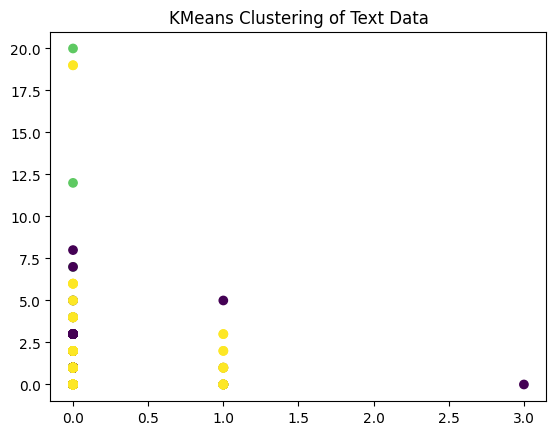

In [33]:
# Optional: Visualize the clusters (if you have a lot of data, you may need dimensionality reduction)
plt.scatter(X_vec.toarray()[:, 0], X_vec.toarray()[:, 1], c=kmeans.labels_)
plt.title("KMeans Clustering of Text Data")
plt.show()

<h1>Logisitc Regression (vessel delay), Tokenization: CountVectorizer</h1>

In [34]:
y.head()

0    vessel delay
1    vessel delay
2    vessel delay
3    vessel delay
4    vessel delay
Name: search_query, dtype: object

In [35]:
y.unique()

array(['vessel delay', 'vessel accidents',
       'martime piracy or terrorism risk', 'port congestion',
       'port criminal activites', 'cargo damage and loss',
       'inland transportation risks',
       'maritime environmental impacts and pollution',
       'maritime natural extreme events and extreme weather',
       'maritime cargo and ship detainment',
       'maritime unstable regulatory and politcal environment',
       'maritime'], dtype=object)

In [36]:
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others

In [37]:
y_binary.tail()

615    0
616    0
617    0
618    0
619    0
Name: search_query, dtype: int64

In [38]:
y_binary.head()

0    1
1    1
2    1
3    1
4    1
Name: search_query, dtype: int64

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

In [40]:
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [41]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.92


In [42]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.4336
Information Gain: 0.0251


In [43]:
new_data = ["delay delay delay delay delay singapore congest DELAY"]  # Replace with actual text
new_data_vec = vectorizer.transform(new_data)
prediction = model.predict(new_data_vec)
print(f"Prediction for new data: {'delay' if prediction[0] == 1 else 'not delay'}")

Prediction for new data: not delay


<h1>Logisitc Regression (vessel accidents), Tokenization: CountVectorizer</h1>

In [44]:
y.head()

0    vessel delay
1    vessel delay
2    vessel delay
3    vessel delay
4    vessel delay
Name: search_query, dtype: object

In [45]:
y.unique()

array(['vessel delay', 'vessel accidents',
       'martime piracy or terrorism risk', 'port congestion',
       'port criminal activites', 'cargo damage and loss',
       'inland transportation risks',
       'maritime environmental impacts and pollution',
       'maritime natural extreme events and extreme weather',
       'maritime cargo and ship detainment',
       'maritime unstable regulatory and politcal environment',
       'maritime'], dtype=object)

In [46]:
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others

In [47]:
y_binary.tail()

615    0
616    0
617    0
618    0
619    0
Name: search_query, dtype: int64

In [48]:
y_binary.head()

0    0
1    0
2    0
3    0
4    0
Name: search_query, dtype: int64

In [49]:
X_vec

<620x29448 sparse matrix of type '<class 'numpy.int64'>'
	with 273203 stored elements in Compressed Sparse Row format>

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

In [51]:
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [52]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96


In [53]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.1637
Information Gain: 0.2950


<h1>Logisitc Regression (port congestion), Tokenization: CountVectorizer</h1>

In [54]:
y.head()

0    vessel delay
1    vessel delay
2    vessel delay
3    vessel delay
4    vessel delay
Name: search_query, dtype: object

y.unique()

In [55]:
y_binary = y.apply(lambda x: 1 if x == 'port congestion' else 0)  # 1 for 'vessel delay', 0 for others

In [56]:
y_binary.nunique()

2

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)

In [58]:
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [59]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [60]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.2515
Information Gain: 0.2072


<h1>Logisitc Regression (martime piracy or terrorism risk), Tokenization: CountVectorizer</h1>

In [61]:
y.head()

0    vessel delay
1    vessel delay
2    vessel delay
3    vessel delay
4    vessel delay
Name: search_query, dtype: object

In [62]:
y_binary = y.apply(lambda x: 1 if x == 'martime piracy or terrorism risk' else 0)  # 1 for 'vessel delay', 0 for others

In [63]:
y_binary.nunique()

2

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [65]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97


In [66]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.3451
Entropy after split: 0.2494
Information Gain: 0.0957


<h1>Logisitc Regression (port criminal activites), Tokenization: CountVectorizer</h1>

In [67]:
y_binary = y.apply(lambda x: 1 if x == 'port criminal activites' else 0)  # 1 for 'vessel delay', 0 for others

In [68]:
y_binary.nunique()

2

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [70]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


In [71]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.3451
Entropy after split: 0.0309
Information Gain: 0.3142


In [72]:
# Step 6: Use the trained model to classify new data (optional)
new_data = ["News Europol takes down crime gang that trafficked 35 tonnes of cocaine in containers"]  # Replace with actual text
new_data_vec = vectorizer.transform(new_data)
prediction = model.predict(new_data_vec)
print(f"Prediction for new data: {'criminal' if prediction[0] == 1 else 'not criminal'}")

Prediction for new data: not criminal


<h1>Logisitc Regression (cargo damage and loss), Tokenization: CountVectorizer</h1>

In [73]:
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others

In [74]:
y_binary.nunique()

2

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=700)
model.fit(X_train, y_train)

LogisticRegression(max_iter=700, random_state=42)

In [76]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.92


In [77]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.3538
Information Gain: 0.1049


<h1>Logisitc Regression (inland transportation risks), Tokenization: CountVectorizer</h1>

In [78]:
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others

In [79]:
y_binary.nunique()

2

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [81]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94


In [82]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.3328
Information Gain: 0.1259


<h1>Logisitc Regression (maritime natural extreme events and extreme weather), Tokenization: CountVectorizer</h1>

In [83]:
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others

In [84]:
y_binary.nunique()

2

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [86]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


In [87]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.3451
Entropy after split: 0.2292
Information Gain: 0.1159


<h1>Logisitc Regression (maritime environmental impacts and pollution), Tokenization: CountVectorizer</h1>

In [88]:
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others

In [89]:
y_binary.nunique()

2

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [91]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95


In [92]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.6204
Information Gain: -0.1617


<h1>Logisitc Regression (maritime cargo and ship detainment), Tokenization: CountVectorizer</h1>

In [93]:
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others

In [94]:
y_binary.nunique()

2

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [96]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98


In [97]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.3451
Entropy after split: 0.0355
Information Gain: 0.3096


<h1>Logisitc Regression (maritime unstable regulatory and politcal environment), Tokenization: CountVectorizer</h1>

In [98]:
y_binary = y.apply(lambda x: 1 if x == 'maritime unstable regulatory and politcal environment' else 0)  # 1 for 'vessel delay', 0 for others

In [99]:
y_binary.nunique()

2

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [101]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.96


In [102]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.3451
Entropy after split: 0.2763
Information Gain: 0.0689


<h1>Logisitc Regression (maritime), Tokenization: CountVectorizer</h1>

In [103]:
y_binary = y.apply(lambda x: 1 if x == 'maritime' else 0)  # 1 for 'vessel delay', 0 for others

In [104]:
y_binary.nunique()

2

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [106]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.90
Precision: 0.88
Recall: 0.90
F1 Score: 0.89


In [107]:
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Entropy before split: 0.4587
Entropy after split: 0.6683
Information Gain: -0.2096


In [108]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [109]:
# Step 6: Use the trained model to classify new data (optional)
new_data = ["example text describing a vessel delay"]  # Replace with actual text
new_data_vec = vectorizer.transform(new_data)
prediction = model.predict(new_data_vec)
print(f"Prediction for new data: {'maritime' if prediction[0] == 1 else 'not maritime'}")

Prediction for new data: not maritime


<h2>First Level of Tree: Port criminal activities</h2>

In [110]:
y_binary = y.apply(lambda x: 1 if x == 'port criminal activites' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l1 = LogisticRegression(random_state=42, max_iter=500)
model_l1.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l1.predict(X_test)
y_pred_proba = model_l1.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

Accuracy: 0.98
Precision: 0.98
Recall: 0.98
F1 Score: 0.98
Entropy before split: 0.3451
Entropy after split: 0.0309
Information Gain: 0.3142


<h1>Level 2</h1>

In [111]:
y_pred = model_l1.predict(X_vec)

In [112]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [113]:

# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [114]:
X_vec

<582x29448 sparse matrix of type '<class 'numpy.int64'>'
	with 260583 stored elements in Compressed Sparse Row format>

In [115]:
y.value_counts()

search_query
vessel delay                                             60
vessel accidents                                         60
port congestion                                          60
cargo damage and loss                                    60
inland transportation risks                              60
maritime environmental impacts and pollution             60
maritime                                                 60
martime piracy or terrorism risk                         40
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
maritime unstable regulatory and politcal environment    40
port criminal activites                                   2
Name: count, dtype: int64

<h1>Level 2</h1>

In [116]:
print("vessel delay")
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel delay
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.4771
Entropy after split: 0.4005
Information Gain: 0.0766


In [117]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.96
Entropy before split: 0.4771
Entropy after split: 0.1445
Information Gain: 0.3326


In [118]:
print("port congestion")
y_binary = y.apply(lambda x: 1 if x == 'port congestion' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

port congestion
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Entropy before split: 0.4771
Entropy after split: 0.1389
Information Gain: 0.3382


In [119]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Entropy before split: 0.4771
Entropy after split: 0.3102
Information Gain: 0.1669


In [120]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.94
Entropy before split: 0.4771
Entropy after split: 0.3879
Information Gain: 0.0891


In [121]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.4771
Entropy after split: 0.1489
Information Gain: 0.3282


In [122]:
print("maritime")
y_binary = y.apply(lambda x: 1 if x == 'maritime' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Entropy before split: 0.4771
Entropy after split: 0.3726
Information Gain: 0.1044


In [123]:
print("martime piracy or terrorism risk")
y_binary = y.apply(lambda x: 1 if x == 'martime piracy or terrorism risk' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

martime piracy or terrorism risk
Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1 Score: 0.98
Entropy before split: 0.3598
Entropy after split: 0.3055
Information Gain: 0.0543


In [124]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.97
Precision: 0.98
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.3598
Entropy after split: 0.1105
Information Gain: 0.2493


In [125]:
print("maritime cargo and ship detainment   ")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment   
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.3598
Entropy after split: 0.0854
Information Gain: 0.2745


In [126]:
print("maritime unstable regulatory and politcal environment")
y_binary = y.apply(lambda x: 1 if x == 'maritime unstable regulatory and politcal environment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime unstable regulatory and politcal environment
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Entropy before split: 0.3598
Entropy after split: 0.0515
Information Gain: 0.3084


<h2>Second Level of Tree: Port congestion</h2>

In [127]:
print("port congestion")
y_binary = y.apply(lambda x: 1 if x == 'port congestion' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l2 = LogisticRegression(random_state=42, max_iter=500)
model_l2.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l2.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l2.predict(X_test)
y_pred_proba = model_l2.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

port congestion
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Entropy before split: 0.4771
Entropy after split: 0.1389
Information Gain: 0.3382


In [128]:
y_pred = model_l2.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [129]:
y.value_counts()

search_query
vessel accidents                                         60
cargo damage and loss                                    60
inland transportation risks                              60
maritime environmental impacts and pollution             60
maritime                                                 60
vessel delay                                             57
martime piracy or terrorism risk                         40
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
maritime unstable regulatory and politcal environment    40
port congestion                                           5
port criminal activites                                   2
Name: count, dtype: int64

<h1>Level 3</h1>

In [130]:
print("vessel accidents ")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents 
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.5127
Entropy after split: 0.2831
Information Gain: 0.2296


In [131]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=700)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Entropy before split: 0.5127
Entropy after split: 0.3043
Information Gain: 0.2084


In [132]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.5127
Entropy after split: 0.6045
Information Gain: -0.0918


In [133]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.5127
Entropy after split: 0.2553
Information Gain: 0.2574


In [134]:
print("maritime")
y_binary = y.apply(lambda x: 1 if x == 'maritime' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.91
Entropy before split: 0.5127
Entropy after split: 0.4543
Information Gain: 0.0584


In [135]:
print("vessel delay")
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel delay
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Entropy before split: 0.4839
Entropy after split: 0.2818
Information Gain: 0.2021


In [136]:
print("martime piracy or terrorism risk")
y_binary = y.apply(lambda x: 1 if x == 'martime piracy or terrorism risk' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

martime piracy or terrorism risk
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Entropy before split: 0.3886
Entropy after split: 0.0209
Information Gain: 0.3677


In [137]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Entropy before split: 0.3886
Entropy after split: 0.0995
Information Gain: 0.2891


In [138]:
print("maritime cargo and ship detainment")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Entropy before split: 0.3886
Entropy after split: 0.0494
Information Gain: 0.3392


In [139]:
print("maritime unstable regulatory and politcal environment")
y_binary = y.apply(lambda x: 1 if x == 'maritime unstable regulatory and politcal environment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime unstable regulatory and politcal environment
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.3886
Entropy after split: 0.1904
Information Gain: 0.1982


<h2>Third Level of Tree: Maritime piracy or terrorism risk</h2>

In [140]:
print("martime piracy or terrorism risk")
y_binary = y.apply(lambda x: 1 if x == 'martime piracy or terrorism risk' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l3 = LogisticRegression(random_state=42, max_iter=500)
model_l3.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l3.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l3.predict(X_test)
y_pred_proba = model_l3.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

martime piracy or terrorism risk
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Entropy before split: 0.3886
Entropy after split: 0.0209
Information Gain: 0.3677


In [141]:
y_pred = model_l3.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [142]:
y.value_counts()

search_query
vessel accidents                                         60
inland transportation risks                              60
maritime environmental impacts and pollution             60
maritime                                                 60
cargo damage and loss                                    59
vessel delay                                             57
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
maritime unstable regulatory and politcal environment    40
port congestion                                           5
port criminal activites                                   2
Name: count, dtype: int64

<h1>Level 4</h1>

In [143]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.91
Precision: 0.90
Recall: 0.91
F1 Score: 0.91
Entropy before split: 0.5399
Entropy after split: 0.3609
Information Gain: 0.1790


In [144]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=700)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Entropy before split: 0.5399
Entropy after split: 0.3491
Information Gain: 0.1908


In [145]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.5399
Entropy after split: 0.7424
Information Gain: -0.2024


In [146]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Entropy before split: 0.5399
Entropy after split: 0.3082
Information Gain: 0.2317


In [147]:
print("maritime")
y_binary = y.apply(lambda x: 1 if x == 'maritime' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.5399
Entropy after split: 0.1070
Information Gain: 0.4329


In [148]:
print("vessel delay")
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel delay
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
Entropy before split: 0.5101
Entropy after split: 0.3329
Information Gain: 0.1772


In [149]:
print("maritime cargo and ship detainment")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.4108
Entropy after split: 0.0762
Information Gain: 0.3346


In [150]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
Entropy before split: 0.4108
Entropy after split: 0.4920
Information Gain: -0.0812


In [151]:
print("maritime unstable regulatory and politcal environment")
y_binary = y.apply(lambda x: 1 if x == 'maritime unstable regulatory and politcal environment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime unstable regulatory and politcal environment
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.4108
Entropy after split: 0.1617
Information Gain: 0.2491


<h2>Fourth Level of Tree: Maritime</h2>

In [152]:
print("maritime")
y_binary = y.apply(lambda x: 1 if x == 'maritime' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l4 = LogisticRegression(random_state=42, max_iter=500)
model_l4.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l4.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l4.predict(X_test)
y_pred_proba = model_l4.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.5399
Entropy after split: 0.1070
Information Gain: 0.4329


In [153]:
y_pred = model_l4.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [154]:
y.value_counts()

search_query
vessel accidents                                         60
inland transportation risks                              60
maritime environmental impacts and pollution             60
cargo damage and loss                                    59
vessel delay                                             57
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
maritime unstable regulatory and politcal environment    40
port congestion                                           5
maritime                                                  4
port criminal activites                                   2
Name: count, dtype: int64

<h1>Level 5</h1>

In [155]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.5830
Entropy after split: 0.2402
Information Gain: 0.3429


In [156]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.5830
Entropy after split: 0.3065
Information Gain: 0.2765


In [157]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.91
Precision: 0.90
Recall: 0.91
F1 Score: 0.90
Entropy before split: 0.5830
Entropy after split: 0.4864
Information Gain: 0.0966


In [158]:
print("maritime cargo and ship detainment")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Entropy before split: 0.4465
Entropy after split: 0.1698
Information Gain: 0.2767


In [159]:
print("vessel delay")
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel delay
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Entropy before split: 0.5517
Entropy after split: 0.2446
Information Gain: 0.3071


In [160]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification
    
# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Entropy before split: 0.5830
Entropy after split: 0.2771
Information Gain: 0.3060


In [161]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.94
Precision: 0.94
Recall: 0.94
F1 Score: 0.94
Entropy before split: 0.4465
Entropy after split: 0.5213
Information Gain: -0.0748


In [162]:
print("maritime unstable regulatory and politcal environment")
y_binary = y.apply(lambda x: 1 if x == 'maritime unstable regulatory and politcal environment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime unstable regulatory and politcal environment
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Entropy before split: 0.4465
Entropy after split: 0.0715
Information Gain: 0.3750


<h2>Fifth Level of Tree: maritime unstable regulatory and politcal environment</h2>

In [163]:
print("maritime unstable regulatory and politcal environment")
y_binary = y.apply(lambda x: 1 if x == 'maritime unstable regulatory and politcal environment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l5 = LogisticRegression(random_state=42, max_iter=500)
model_l5.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l5.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l5.predict(X_test)
y_pred_proba = model_l5.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime unstable regulatory and politcal environment
Accuracy: 0.99
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
Entropy before split: 0.4465
Entropy after split: 0.0715
Information Gain: 0.3750


In [164]:
y_pred = model_l5.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [165]:
y.value_counts()

search_query
vessel accidents                                         60
inland transportation risks                              60
maritime environmental impacts and pollution             60
cargo damage and loss                                    59
vessel delay                                             57
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
port congestion                                           5
maritime                                                  4
port criminal activites                                   2
maritime unstable regulatory and politcal environment     1
Name: count, dtype: int64

<h1>Level 6</h1>

In [166]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
Entropy before split: 0.6194
Entropy after split: 0.2668
Information Gain: 0.3526


In [167]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
Entropy before split: 0.6194
Entropy after split: 0.8026
Information Gain: -0.1833


In [168]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1 Score: 0.95
Entropy before split: 0.6194
Entropy after split: 0.2535
Information Gain: 0.3659


In [169]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.90
Precision: 0.89
Recall: 0.90
F1 Score: 0.89
Entropy before split: 0.6194
Entropy after split: 0.3087
Information Gain: 0.3106


In [170]:
print("vessel delay")
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel delay
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.5869
Entropy after split: 0.2060
Information Gain: 0.3809


In [171]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")


maritime natural extreme events and extreme weather
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.93
Entropy before split: 0.4771
Entropy after split: 0.7404
Information Gain: -0.2634


In [172]:
print("maritime cargo and ship detainment")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Entropy before split: 0.4771
Entropy after split: 0.1132
Information Gain: 0.3639


<h2>Sixth Level of Tree: vessel delay</h2>

In [173]:
print("vessel delay")
y_binary = y.apply(lambda x: 1 if x == 'vessel delay' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l6 = LogisticRegression(random_state=42, max_iter=500)
model_l6.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l6.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l6.predict(X_test)
y_pred_proba = model_l6.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel delay
Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
Entropy before split: 0.5869
Entropy after split: 0.2060
Information Gain: 0.3809


In [174]:
y_pred = model_l6.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [175]:
y.value_counts()

search_query
vessel accidents                                         60
inland transportation risks                              60
maritime environmental impacts and pollution             60
cargo damage and loss                                    59
maritime natural extreme events and extreme weather      40
maritime cargo and ship detainment                       40
maritime                                                  4
port congestion                                           3
port criminal activites                                   2
maritime unstable regulatory and politcal environment     1
vessel delay                                              1
Name: count, dtype: int64

<h1>Seventh Level</h1>

In [176]:
print("vessel accidents ")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents 
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.88
Entropy before split: 0.6840
Entropy after split: 0.2864
Information Gain: 0.3976


In [177]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.92
Precision: 0.93
Recall: 0.92
F1 Score: 0.92
Entropy before split: 0.6840
Entropy after split: 0.4138
Information Gain: 0.2703


In [178]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.88
Entropy before split: 0.6840
Entropy after split: 0.4207
Information Gain: 0.2633


In [179]:
print("maritime cargo and ship detainment")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98
Entropy before split: 0.5328
Entropy after split: 0.0274
Information Gain: 0.5054


In [180]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")


maritime natural extreme events and extreme weather
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Entropy before split: 0.5328
Entropy after split: 0.9017
Information Gain: -0.3689


In [181]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.92
Precision: 0.92
Recall: 0.92
F1 Score: 0.92
Entropy before split: 0.6840
Entropy after split: 0.5456
Information Gain: 0.1385


<h2>Seventh Level of Tree: maritime cargo and ship detainment</h2>

In [182]:
print("maritime cargo and ship detainment")
y_binary = y.apply(lambda x: 1 if x == 'maritime cargo and ship detainment' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l7 = LogisticRegression(random_state=42, max_iter=500)
model_l7.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l7.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l7.predict(X_test)
y_pred_proba = model_l7.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime cargo and ship detainment
Accuracy: 0.98
Precision: 0.99
Recall: 0.98
F1 Score: 0.98
Entropy before split: 0.5328
Entropy after split: 0.0274
Information Gain: 0.5054


In [183]:
y_pred = model_l7.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0

In [184]:
y.value_counts()

search_query
vessel accidents                                         60
inland transportation risks                              60
maritime environmental impacts and pollution             60
cargo damage and loss                                    59
maritime natural extreme events and extreme weather      40
maritime                                                  4
port congestion                                           3
port criminal activites                                   2
maritime cargo and ship detainment                        1
maritime unstable regulatory and politcal environment     1
vessel delay                                              1
Name: count, dtype: int64

<h2>Eigth Level</h2>

In [185]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Entropy before split: 0.7287
Entropy after split: 0.6345
Information Gain: 0.0942


In [186]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.7287
Entropy after split: 0.5050
Information Gain: 0.2237


In [187]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.88
Precision: 0.88
Recall: 0.88
F1 Score: 0.88
Entropy before split: 0.7287
Entropy after split: 0.5298
Information Gain: 0.1988


In [188]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.7287
Entropy after split: 0.2405
Information Gain: 0.4881


In [189]:

print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.94
Entropy before split: 0.5726
Entropy after split: 0.8801
Information Gain: -0.3076


<h2>Eigth Level of Tree: maritime environmental impacts and pollution</h2>

In [190]:
print("maritime environmental impacts and pollution")
y_binary = y.apply(lambda x: 1 if x == 'maritime environmental impacts and pollution' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l8 = LogisticRegression(random_state=42, max_iter=500)
model_l8.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l8.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l8.predict(X_test)
y_pred_proba = model_l8.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime environmental impacts and pollution
Accuracy: 0.93
Precision: 0.94
Recall: 0.93
F1 Score: 0.93
Entropy before split: 0.7287
Entropy after split: 0.2405
Information Gain: 0.4881


In [191]:
y_pred = model_l8.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0
y.value_counts()

search_query
vessel accidents                                         60
inland transportation risks                              60
cargo damage and loss                                    59
maritime natural extreme events and extreme weather      40
maritime                                                  4
maritime environmental impacts and pollution              4
port congestion                                           3
port criminal activites                                   2
maritime cargo and ship detainment                        1
maritime unstable regulatory and politcal environment     1
vessel delay                                              1
Name: count, dtype: int64

<h1>Nineth Level</h1>

In [192]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Entropy before split: 0.8196
Entropy after split: 0.5106
Information Gain: 0.3090


In [193]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.86
Entropy before split: 0.8196
Entropy after split: 0.7724
Information Gain: 0.0472


In [194]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")


cargo damage and loss
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91
Entropy before split: 0.8196
Entropy after split: 0.5341
Information Gain: 0.2855


In [195]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1 Score: 0.96
Entropy before split: 0.6582
Entropy after split: 1.1439
Information Gain: -0.4857


<h2>Nineth Level of Tree: vessel accidents</h2>

In [196]:
print("vessel accidents")
y_binary = y.apply(lambda x: 1 if x == 'vessel accidents' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l9 = LogisticRegression(random_state=42, max_iter=500)
model_l9.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l9.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l9.predict(X_test)
y_pred_proba = model_l9.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

vessel accidents
Accuracy: 0.87
Precision: 0.87
Recall: 0.87
F1 Score: 0.87
Entropy before split: 0.8196
Entropy after split: 0.5106
Information Gain: 0.3090


In [197]:
y_pred = model_l9.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0
y.value_counts()

search_query
inland transportation risks                              59
cargo damage and loss                                    58
maritime natural extreme events and extreme weather      40
vessel accidents                                          5
maritime environmental impacts and pollution              4
port congestion                                           3
maritime                                                  3
port criminal activites                                   2
maritime cargo and ship detainment                        1
maritime unstable regulatory and politcal environment     1
vessel delay                                              1
Name: count, dtype: int64

<h1>Tenth level</h1>

In [198]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Entropy before split: 0.9183
Entropy after split: 0.6625
Information Gain: 0.2558


In [199]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.86
Precision: 0.86
Recall: 0.86
F1 Score: 0.86
Entropy before split: 0.9183
Entropy after split: 0.4080
Information Gain: 0.5103


In [200]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
Entropy before split: 0.7642
Entropy after split: 0.2341
Information Gain: 0.5301


<h2>Tenth Level of Tree: maritime natural extreme events and extreme weather</h2>

In [201]:
print("maritime natural extreme events and extreme weather")
y_binary = y.apply(lambda x: 1 if x == 'maritime natural extreme events and extreme weather' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l10 = LogisticRegression(random_state=42, max_iter=500)
model_l10.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l10.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l10.predict(X_test)
y_pred_proba = model_l10.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

maritime natural extreme events and extreme weather
Accuracy: 0.94
Precision: 0.96
Recall: 0.94
F1 Score: 0.95
Entropy before split: 0.7642
Entropy after split: 0.2341
Information Gain: 0.5301


In [202]:
y_pred = model_l10.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0
y.value_counts()

search_query
inland transportation risks                              59
cargo damage and loss                                    55
vessel accidents                                          5
maritime environmental impacts and pollution              4
port congestion                                           3
maritime                                                  3
port criminal activites                                   2
maritime natural extreme events and extreme weather       2
maritime cargo and ship detainment                        1
maritime unstable regulatory and politcal environment     1
vessel delay                                              1
Name: count, dtype: int64

<h1>Eleventh Level</h1>

In [203]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.75
Precision: 0.75
Recall: 0.75
F1 Score: 0.75
Entropy before split: 0.9852
Entropy after split: 0.7277
Information Gain: 0.2575


In [204]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.89
Precision: 0.92
Recall: 0.89
F1 Score: 0.89
Entropy before split: 0.9666
Entropy after split: 0.4620
Information Gain: 0.5046


<h2>Eleventh Level of Tree: cargo damage and loss</h2>

In [205]:
print("cargo damage and loss")
y_binary = y.apply(lambda x: 1 if x == 'cargo damage and loss' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model_l11 = LogisticRegression(random_state=42, max_iter=500)
model_l11.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model_l11.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model_l11.predict(X_test)
y_pred_proba = model_l11.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

cargo damage and loss
Accuracy: 0.89
Precision: 0.92
Recall: 0.89
F1 Score: 0.89
Entropy before split: 0.9666
Entropy after split: 0.4620
Information Gain: 0.5046


In [206]:
y_pred = model_l11.predict(X_vec)
# Step 1: Create a mask for y_pred == 0
mask = (y_pred == 0)

# Step 2: Apply the mask to X and y to filter rows where y_pred is 0
X = X[mask]  # Assuming X is the DataFrame containing the text data
y = y[mask]  # Filter y similarly
X_vec = X_vec[mask]

# Now X_filtered and y_filtered only contain the rows where y_pred is 0
y.value_counts()

search_query
inland transportation risks                              57
maritime environmental impacts and pollution              4
port congestion                                           3
maritime                                                  3
vessel accidents                                          2
port criminal activites                                   2
cargo damage and loss                                     1
maritime cargo and ship detainment                        1
maritime unstable regulatory and politcal environment     1
vessel delay                                              1
Name: count, dtype: int64

<h1>Twelvth Level</h1>

In [207]:
print("inland transportation risks")
y_binary = y.apply(lambda x: 1 if x == 'inland transportation risks' else 0)  # 1 for 'vessel delay', 0 for others
X_train, X_test, y_train, y_test = train_test_split(X_vec, y_binary, test_size=0.2, random_state=42, stratify=y_binary)
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)  # Predicted probabilities for entropy calculation

# Function to calculate entropy
def entropy(labels):
    # Count occurrences of each class label
    label_counts = np.bincount(labels)
    # Calculate probabilities
    probabilities = label_counts / len(labels)
    # Calculate entropy
    return -np.sum([p * np.log2(p) for p in probabilities if p > 0])

# Entropy before split (based on actual labels in y_test)
entropy_before = entropy(y_test)

# Entropy after split (based on predicted labels in y_pred)
entropy_after = log_loss(y_test, y_pred_proba) / np.log(2)  # log_loss gives log loss in base e, convert to base 2

# Information gain is the difference in entropy
information_gain = entropy_before - entropy_after

# Print the results
print(f"Entropy before split: {entropy_before:.4f}")
print(f"Entropy after split: {entropy_after:.4f}")
print(f"Information Gain: {information_gain:.4f}")

inland transportation risks
Accuracy: 0.80
Precision: 0.79
Recall: 0.80
F1 Score: 0.79
Entropy before split: 0.8366
Entropy after split: 0.9719
Information Gain: -0.1353


<h2>Twelvth Level of Tree: vessel accidents</h2>

In [208]:
# We do not build for this level as it led to information loss

Number of unlabelled data:

<h1>Predictor</h1>

In [209]:

def predict_new_input(new_input):
    clean_input = clean_text(new_input)
    new_input_vec = vectorizer.transform([clean_input])
    print(model_l1.predict(new_input_vec))
    print(model_l2.predict(new_input_vec))
    print(model_l3.predict(new_input_vec))
    print(model_l4.predict(new_input_vec))
    print(model_l5.predict(new_input_vec))
    print(model_l6.predict(new_input_vec))
    print(model_l7.predict(new_input_vec))
    print(model_l8.predict(new_input_vec))
    print(model_l9.predict(new_input_vec))
    print(model_l10.predict(new_input_vec))
    print(model_l11.predict(new_input_vec))
    
    # Step 2: Use the model to make a prediction
    if model_l1.predict(new_input_vec):
        return "level 1: Port criminal activities"
    if model_l2.predict(new_input_vec):
        return "level 2: Port congestion"
    if model_l3.predict(new_input_vec):
        return "level 3: Maritime cargo and ship detainment"
    if model_l4.predict(new_input_vec):
        return "level 4: Maritime environmental impacts and pollution"
    if model_l5.predict(new_input_vec):
        return "level 5: Martime piracy or terrorism risk"
    if model_l6.predict(new_input_vec):
        return "level 6: Maritime"
    if model_l7.predict(new_input_vec):
        return "level 7: Maritime unstable regulatory and politcal environment"
    if model_l8.predict(new_input_vec):
        return "level 8: Vessel delay"
    if model_l9.predict(new_input_vec):
        return "level 9: Inland transportation risks"
    if model_l10.predict(new_input_vec):
        return "level 10: Maritime natural extreme events and extreme weather"
    if model_l11.predict(new_input_vec):
        return "level 11: Cargo damage and loss"
    return "Not maritime incident"
    
# Test with your specific input
new_input = " The world’s second-busiest container port in Singapore is facing a severe spike in congestion, causing carriers to extend charter agreements and build up container fleets for an extended peak season. Analyst Linerlytica reported that new port congestion, compounded by Red Sea diversions, has worsened an already strained container market struggling with equipment shortages and vessel space. Global port congestion reached 2 million TEUs, representing 6.8% of the global fleet, with Singapore becoming a key congestion hotspot. The SCFI (Shanghai Containerized Freight Index) jumped 42% in the past month, with more rate hikes expected as carriers add new surcharges. Berthing delays in Singapore have reached up to seven days, forcing carriers to bypass the port to maintain schedules. The total capacity waiting to berth has risen to 450,000 TEUs, with further delays and schedule disruptions anticipated at downstream ports. Congestion is reminiscent of the 2021-2022 crisis, with 400,000 TEUs of vessel capacity taken out of circulation in the past week. As ships return from extended journeys around the African Cape, carriers are struggling with insufficient tonnage to handle longer supply chains, leading to further port congestion."
print(predict_new_input(new_input))


[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[0]
level 6: Maritime


In [210]:
new_input = "Port of Singapore has announced a major turnaround in waiting times amid introduction of night-time barge operations and expanded facilities."
print(predict_new_input(new_input))

[0]
[1]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
level 2: Port congestion


In [211]:
new_input = "ON OCT 27, a sea robbery onboard a Marshall Islands-flagged bulk carrier was reported to the Maritime Rescue Coordination Centre (MRCC), which is operated by the Maritime and Port Authority of Singapore (MPA). This happened in the Strait of Malacca, outside Singapore’s territorial waters, at about 4.30 am, as the vessel was headed for Singapore.Details are sketchy, but the MRCC directed the vessel to anchor off western Singapore for a search by the Police Coast Guard. Nothing was reported missing, but the ship’s master was injured, and had to be taken ashore for medical treatment. An MPA statement at the time said that he was in “stable” condition. His injury was not fatal, but the violent nature of the attack is a cause for concern, amid a rise in piracy globally and in the waters off Singapore; the fall in the number of attacks on ships, reported at the start of the year, is reversing and headed north again. Incidentally, the terminology can be confusing. A “sea robbery” (or “armed robbery”) is one that happens within territorial waters. The word “piracy” is reserved for incidents that take place in international waters, or “the high seas”. Both the 1982 United Nations Convention on the Law of the Sea (Unclos) and the International Maritime Organization (IMO) make this distinction. However, the MPA characterised the Oct 27 incident as a “sea robbery”, though it took place outside Singapore’s territorial waters."
print(predict_new_input(new_input))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[0]
[0]
level 9: Inland transportation risks


In [212]:
import pickle
import joblib
import os

def save_model(model, filepath, use_joblib=False):
    """
    Save a machine learning model to disk using pickle or joblib.
    
    Parameters:
    model: The trained model to save
    filepath: str, path where model will be saved
    use_joblib: bool, whether to use joblib instead of pickle (better for large models)
    """
    try:
        # Create directory if it doesn't exist
        os.makedirs(os.path.dirname(filepath), exist_ok=True)
        
        if use_joblib:
            joblib.dump(model, filepath)
        else:
            with open(filepath, 'wb') as file:
                pickle.dump(model, file)
        print(f"Model successfully saved to {filepath}")
        
    except Exception as e:
        print(f"Error saving model: {str(e)}")

In [213]:
import joblib
from pathlib import Path

# Create models directory if it doesn't exist
models_dir = Path('models')
models_dir.mkdir(exist_ok=True)

# Save vectorizer
joblib.dump(vectorizer, models_dir / 'vectorizer.joblib')
print("Vectorizer saved successfully")

# Dictionary to keep track of all models
models = {
    'model_l1': model_l1,
    'model_l2': model_l2,
    'model_l3': model_l3,
    'model_l4': model_l4,
    'model_l5': model_l5,
    'model_l6': model_l6,
    'model_l7': model_l7,
    'model_l8': model_l8,
    'model_l9': model_l9,
    'model_l10': model_l10,
    'model_l11': model_l11
}

# Save each model
for model_name, model in models.items():
    joblib.dump(model, models_dir / f'{model_name}.joblib')
    print(f"Saved {model_name}")

# Quick verification that files exist
saved_files = list(models_dir.glob('*.joblib'))
print("\nSaved files:")
for file in saved_files:
    print(f"- {file.name}")

# Test loading one model to verify
test_model = joblib.load(models_dir / 'model_l1.joblib')
print("\nTest load successful!")

Vectorizer saved successfully
Saved model_l1
Saved model_l2
Saved model_l3
Saved model_l4
Saved model_l5
Saved model_l6
Saved model_l7
Saved model_l8
Saved model_l9
Saved model_l10
Saved model_l11

Saved files:
- model_l1.joblib
- model_l10.joblib
- model_l11.joblib
- model_l2.joblib
- model_l3.joblib
- model_l4.joblib
- model_l5.joblib
- model_l6.joblib
- model_l7.joblib
- model_l8.joblib
- model_l9.joblib
- vectorizer.joblib

Test load successful!
